## 项目背景
PM2.5的检测数值通常包含在环境部门和公司的空气质量报告中。 PM2.5是指大气颗粒物（PM），其直径小于或等于2.5微米。在环境科学中，特指悬浮在空气中的固体颗粒或液滴，是空气污染的主要来源之一。
  
本项目打算从数据分析的角度，简单解析一下五大城市的PM2.5的情况，并且针对性对我感兴趣的问题进行详细分析。


## 观察数据  

本数据包含有中国五个城市(北京、上海、成都、广州、沈阳)从2010/1/1-2015/12/31的空气和气象数据。数据中的缺失值被标记为NaN。数据列名的含义如下：

No: 行号  
year: 年份  
month: 月份  
day: 日期  
hour: 小时  
season: 季节  
PM: PM2.5浓度 (ug/m^3)  
DEWP: 露点温度，指空气在水汽含量和气压都不改变的条件下，冷却到饱和时的温度   
TEMP: 摄氏温度    
HUMI: 湿度 (%)  
PRES: 气压 (hPa)  
cbwd: 风向  
Iws: 风速 (m/s)  
precipitation: 降水量/时 (mm)  
Iprec: 累计降水量 (mm)  
  
其中与PM2.5浓度相关的数据包含有多列，其中`PM_US Post` 的数据来源是[US Department of State Air Quality Monitoring Program](http://www.stateair.net/web/post/1/4.html)。其他PM相关的数据来源于中国生态环境部在五个城市设置的不同站点，比如`PM_Xuhui`位于上海市徐汇区。

本项目中的数据可以从[Kaggle网站](https://www.kaggle.com/uciml/pm25-data-for-five-chinese-cities)上下载到。

## 1. 提出问题
根据数据，初步思考，提出以下问题：

1.2013-2015年北京市污染情况怎么样？  
2.2013-2015年广州市PM2.5有什么变化趋势？
  
##观察数据，留意到2010-2012年五大城市PM2.5浓度相关数据缺失情况比较严重，故问题直接取2013年-2015年的数据。


## 2. 数据整理

### 2.1. 导入数据&查看基本信息

建立一个Ipython文件，导入本项目可能用到的库，如文本读取的csv，数据分析的numpy和pandas,作图的matplotlib和seaborn

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import pylab as pl
%matplotlib inline

以北京,广州数据为例，我们先使用Pandas的read_csv函数导入数据集，并使用head、info方法来查看数据中的基本信息。

In [2]:
Beijing_data = pd.read_csv('BeijingPM20100101_20151231.csv')
Guangzhou_data = pd.read_csv('GuangzhouPM20100101_20151231.csv')

In [3]:
Beijing_data.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [4]:
Guangzhou_data.head()

,No,year,month,day,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4.0,NaN,NaN,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0
1,2,2010,1,1,1,4.0,NaN,NaN,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0
2,3,2010,1,1,2,4.0,NaN,NaN,NaN,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3
3,4,2010,1,1,3,4.0,NaN,NaN,NaN,10.2,89.0,1014.9,12.0,NW,1.4,0.6,0.9
4,5,2010,1,1,4,4.0,NaN,NaN,NaN,10.4,91.0,1014.6,11.8,NE,0.6,0.7,1.6


In [5]:
Beijing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
No                 52584 non-null int64
year               52584 non-null int64
month              52584 non-null int64
day                52584 non-null int64
hour               52584 non-null int64
season             52584 non-null int64
PM_Dongsi          25052 non-null float64
PM_Dongsihuan      20508 non-null float64
PM_Nongzhanguan    24931 non-null float64
PM_US Post         50387 non-null float64
DEWP               52579 non-null float64
HUMI               52245 non-null float64
PRES               52245 non-null float64
TEMP               52579 non-null float64
cbwd               52579 non-null object
Iws                52579 non-null float64
precipitation      52100 non-null float64
Iprec              52100 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.2+ MB


In [6]:
Guangzhou_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 17 columns):
No                      52584 non-null int64
year                    52584 non-null int64
month                   52584 non-null int64
day                     52584 non-null int64
hour                    52584 non-null int64
season                  52583 non-null float64
PM_City Station         32352 non-null float64
PM_5th Middle School    21095 non-null float64
PM_US Post              32352 non-null float64
DEWP                    52583 non-null float64
HUMI                    52583 non-null float64
PRES                    52583 non-null float64
TEMP                    52583 non-null float64
cbwd                    52583 non-null object
Iws                     52583 non-null float64
precipitation           52583 non-null float64
Iprec                   52583 non-null float64
dtypes: float64(11), int64(5), object(1)
memory usage: 6.8+ MB


1.取样的北京和广州数据中分别都有17个字段，52584条记录；  
2.通过缺失值分析和原始数据回顾，发现PM2.5相关的三个数据缺失比较严重，特别是2010年-2012年的数据。

### 2.2. 数据处理

去除变量的空格，把空格改为下划线，以防后期出现的错误。

In [7]:
Beijing_data.columns = [c.replace(' ', '_') for c in Beijing_data.columns]
Guangzhou_data.columns = [c.replace(' ', '_') for c in Guangzhou_data.columns]

将season中的数值1,2,3,4转换为对应的季节，使季节数据更加直观。

In [8]:
Beijing_data['season'] = Beijing_data['season'].map({1:'Spring', 2:'Summer', 3:'Autumn', 4: 'Winter'})
Guangzhou_data['season'] = Guangzhou_data['season'].map({1:'Spring', 2:'Summer', 3:'Autumn', 4: 'Winter'})

### 2.3. 数据筛选

目前已经得到了处理好的北京市和广州市的数据，所以还定义一个函数来筛选出我们所需要的2013-2015年的数据。

In [9]:
#定义filter_data函数，输入data,condition两个参数，用于根据condition筛选出合适的Data。 Example: [" year> 2012", "season == 'Winter'"]
def filter_data(data, condition):
    
    #分裂condition，分别赋值。
    field, op, value = condition.split(" ", 2)
    
    #确定field是否有效。
    if field not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe.".format(field))
        
    #区分value的数据类型，如是数值数据，则格式为浮点数；如是字符数据，则去掉双引号单引号。
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")

    # 区分 op
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: 
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    #输出数据并且重置索引
    data = data[matches].reset_index(drop = True)
    return data

筛选出2013年-2015年 北京市和广州市的数据

In [10]:
BJ_data = filter_data(Beijing_data, 'year >= 2013')
GZ_data = filter_data(Guangzhou_data, 'year >= 2013')

## 3. 数据分析&可视化

### 3.1. 数据展示

目前已经得到筛选后的数据，即2013年-2015年广州市和北京市的数据；由于其他数值缺失情况缘故，我重点关注PM_US_Post的数据，并取值PM_US_Post的数据作为PM2.5的标准数据。

In [11]:
# 定义 reading_data函数，输入data参数，verbose可选，该参数决定是否打印被选择的数据的详细统计信息。
def reading_data(data, verbose = True):

    #统计数据总数
    n_data = data.shape[0]
    n_data_pmuspost = data['PM_US_Post'].dropna().shape[0]

    # 求均值和四分位数
    pm_mean = data['PM_US_Post'].mean()
    pm_qtiles = data['PM_US_Post'].quantile([.25, .5, .75]).as_matrix()
    
    # 确实是否要展示详细信息
    if verbose:
        print('总计有 {:d} 条数据，其中PM_US_Post站点记录有{:d}条。'.format(n_data,n_data_pmuspost))
        print('PM2.5浓度的平均数值为 {:.2f} ug/m^3.'.format(pm_mean))
        print('PM2.5浓度的中位数为 {:.2f} ug/m^3.'.format(pm_qtiles[1]))
        print('有25%的PM 2.5浓度的读数小于 {:.2f} ug/m^3.'.format(pm_qtiles[0]))
        print('有25%的PM 2.5浓度的读数大于 {:.2f} ug/m^3.'.format(pm_qtiles[2]))
        
        #作箱线图
        seaborn.boxplot(data['PM_US_Post'], showfliers=False)
        plt.title('Boxplot of PM 2.5 of filtered data')
        plt.xlabel('PM_US Post (ug/m^3)')
    return None

### 3.2.问题解答

#### 第一个问题：2013-2015年北京市污染情况怎么样？

总计有 26280 条数据，其中PM_US_Post站点记录有25970条。
PM2.5浓度的平均数值为 94.09 ug/m^3.
PM2.5浓度的中位数为 66.00 ug/m^3.
有25%的PM 2.5浓度的读数小于 27.00 ug/m^3.
有25%的PM 2.5浓度的读数大于 126.00 ug/m^3.


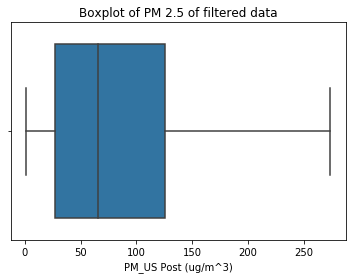

In [12]:
reading_data(BJ_data)

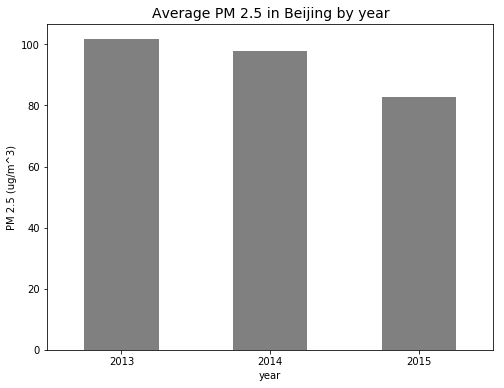

In [13]:
plt.figure(figsize=(8,6))
BJ_data.groupby('year')['PM_US_Post'].mean().plot(kind = 'bar',rot = 0, color = 'grey')
plt.ylabel('PM 2.5 (ug/m^3)')
plt.title('Average PM 2.5 in Beijing by {:s}'.format('year'), fontsize =14)
plt.show()

从图中可以看到：  

1.北京市污染比较严重，属于轻度污染，但是呈现逐年优化的现象。  
  
2.其原因在于，北京市委市政府从2013年开始，执行“北京市2013-2017清洁空气行动计划”，其中一个主要目标就是使PM2.5浓度5年要同比下降25%左右，措施包括压减燃煤、控车减油、工业企业治理。这一系列的举措，明显降低了北京的PM2.5浓度。  
  
资料来源：[北京如何应对雾霾](http://www.sohu.com/a/46277616_115420)  
[PM 2.5_百度百科](https://baike.baidu.com/item/%E7%BB%86%E9%A2%97%E7%B2%92%E7%89%A9/804913?fromtitle=PM2.5&fromid=353332&fr=aladdin#6_1)

#### 第二个问题：2013-2015年广州市PM2.5有什么变化趋势？

总计有 26280 条数据，其中PM_US_Post站点记录有24963条。
PM2.5浓度的平均数值为 48.20 ug/m^3.
PM2.5浓度的中位数为 41.00 ug/m^3.
有25%的PM 2.5浓度的读数小于 23.00 ug/m^3.
有25%的PM 2.5浓度的读数大于 64.00 ug/m^3.


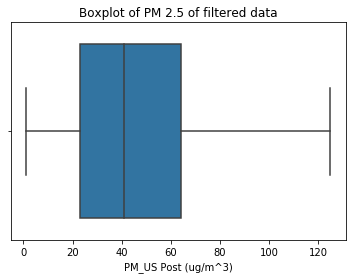

In [14]:
reading_data(GZ_data)

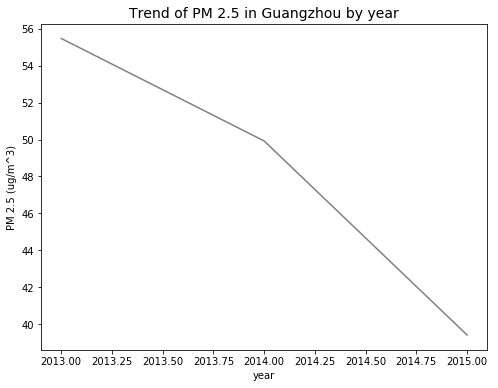

In [15]:
plt.figure(figsize=(8,6))
GZ_data.groupby('year')['PM_US_Post'].mean().plot(kind = 'line',rot = 0, color = 'grey')
plt.ylabel('PM 2.5 (ug/m^3)')
plt.title('Trend of PM 2.5 in Guangzhou by {:s}'.format('year'), fontsize =14)
plt.show()

由图中可以看到：  

2013-2015广州市PM2.5呈下降趋势。

## 4.分析总结

1.此项目使用pandas库对数据进行了导入和整理，并使用matplotlib库的pyplot模块和seaborn库将数据可视化。  
  
2.通过对数据的计算和对图形的观察，顺利的解决了在项目开始时提出的两个问题。但是需要说明的是，本项目中进行的分析仅仅是从数据本身展现出来的情况进行的，仅仅能表明数据之间的相关关系。在所有的分析结论中，数据之间的因果关系或者逻辑关系，仅仅是一种合理推测，并非严格的统计论证。  
  
3.本项目仅初步探索了北京市和广州市PM 2.5浓度的一些问题，并未进行深入的挖掘，待以后有时间，再进行深入探究。